# $作品二、Python 迴圈、矩陣與外部檔案的練習作業$

### 學號 : 411072054 <br> 姓名 : 黃暐宸

### 作品目標：<br> 本作品用於處理數據的 Python 程式，包括了一些迴圈來對數據進行處理，矩陣運算涉及到對數據進行複雜的計算或變換，而對外部檔案的操作則用於載入或保存處理後的數據，其中運用迴圈與Broadcasting的技術繪製同心圓與摩天輪，並透過 scipy.stats 產生卡方右尾面積與自由度對照表。

範例 1： Given x = $[6\;\; 3 \;\; 5 \;\; 8 \;\; 7]$  and y = $[2\;\; 4 \;\; 3 \;\; 7 \;\; 6]$ , compute $\bar{x}, \bar{y} and \bar{\sigma}_x, \bar{\sigma}_y$ where

$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \;\; \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$

$\bar{\sigma}_x = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})^2}, \;\; \bar{\sigma}_y = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (y_i-\bar{y})^2}$

In [4]:
import numpy as np
 
x = np.array([6, 3, 5, 8, 7])
y = np.array([2, 4, 3, 7, 6])

sum_x = x.sum()
n = len(x)
x_bar = x.mean()

# var_x_formula = ((x-x_bar)**2).sum()/(n-1)

var_x = x.var(ddof=1)

# std_x_formula = np.sqrt(var_x)
std_x = x.std(ddof=1)

y_bar = y.mean()
std_y = y.std( ddof = 1)

print('The sample mean of x is {:.4f}'.format(x_bar))
print('The sample variation of x is {}'.format(var_x))
print('The sample standard deviation of x is %.6f' %std_x)


The sample mean of x is 5.8000
The sample variation of x is 3.7
The sample standard deviation of x is 1.923538


### $注意事項與討論$
### 樣本變異數和母體變異數：在計算變異數時，使用了 ddof=1 參數，這表示使用的是樣本變異數而不是母體變異數。這在統計學中是一個重要的區別，確保了對樣本的合適統計描述。

練習： Compute the zscore for the sample $x = [6\;\; 3 \;\; 5 \;\; 8 \;\; 7]$  where

$z_i = \frac{x_i - \bar{x}}{\bar{\sigma}_x}$ for $i=1,2,\cdots, 5$

In [10]:
import numpy as np
from scipy.stats import zscore

x = np.array([6, 3, 5, 8, 7])
z = zscore(x, ddof = 1)
x_bar = x.mean()
std_x = x.std(ddof=1)
z_formula = (x-x_bar)/std_x

print(np.c_[z, z_formula]) 

[[ 0.10397505  0.10397505]
 [-1.45565069 -1.45565069]
 [-0.4159002  -0.4159002 ]
 [ 1.14372554  1.14372554]
 [ 0.62385029  0.62385029]]


### $注意事項與討論$
### 1. 使用 zscore(x, ddof=1) 計算了陣列 x 的 Z 分數，其中 ddof=1 表示使用樣本標準差來進行標準化。
### 2. 通過 x.mean() 和 x.std(ddof=1) 計算了陣列 x 的樣本平均值 x_bar 和樣本標準差 std_x。
### 3. 使用公式 (x - x_bar) / std_x 計算了與 zscore 得到的 Z 分數相同的數值，這是為了驗證 zscore 函數的正確性。

 練習： Given $x = [6\;\; 3 \;\; 5 \;\; 8 \;\; 7]$  and $y = [2\;\; 4 \;\; 3 \;\; 7 \;\; 6]$ , compute the correlation coefficient

$r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}$, where

$S_{xy} = \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$

$S_{xx} = \sum_{i=1}^n (x_i-\bar{x})^2, \;\; S_{yy} = \sum_{i=1}^n (y_i-\bar{y})^2$

In [27]:
import numpy as np
from scipy.stats import pearsonr

x = np.array([6, 3, 5 ,8 ,7])
y = np.array([2, 4, 3 ,7 ,6])

x_bar = x.mean()
y_bar = y.mean()
Sxy = np.sum((x - x_bar) * (y - y_bar))
Sxx = np.sum((x - x_bar)**2)
Syy = np.sum((y - y_bar)**2)
r_formula =  Sxy / np.sqrt(Sxx * Syy)
print('Correlation coefficient by formula is {:.4f}'.format(r_formula))

r_sci = pearsonr(x, y)[0] # the first return value
print('Correlation coefficient by scipy.stats.pearsonr is %.4f' %r_sci)

Correlation coefficient by formula is 0.5892
Correlation coefficient by scipy.stats.pearsonr is 0.5892


### $注意事項與討論$
### 1. 通過 x.mean() 和 y.mean() 分別計算了兩組數據的樣本平均值 x_bar 和 y_bar。
### 2. 使用公式計算了相關係數 r_formula，其中 Sxy 表示協方差，Sxx 和 Syy 分別表示 x 和 y 的變異數。
### 3. 通過 pearsonr(x, y)[0] 使用 SciPy 提供的 pearsonr 函式計算了相關係數，並從返回的結果中獲取了相關係數的值

範例 2： 使用前面範例的 x, y 樣本，繪製 X-Y 散佈圖。

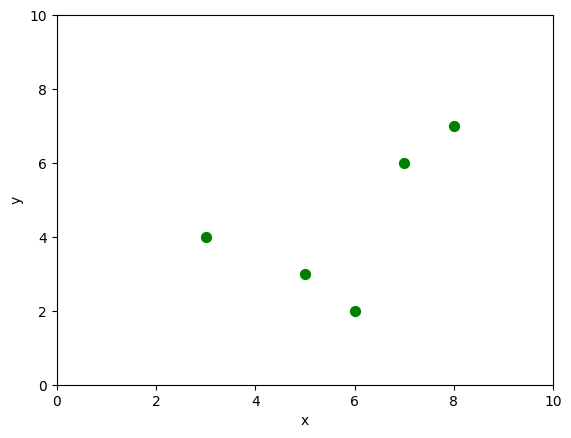

In [28]:
import numpy as np
import matplotlib.pyplot as plt 
 
x = np.array([6, 3, 5, 8, 7])
y = np.array([2, 4, 3, 7, 6])
 
size, color = 50, 'g'
plt.scatter(x, y, s = size, c = color)
 
# arrange axis range for better look
plt.axis([0, 10, 0,10])
plt.xlabel('x'), plt.ylabel('y')
plt.show()


### $注意事項與討論$
### 1. 使用 plt.scatter(x, y, s = size, c = color) 函式繪製了散點圖，其中 x 和 y 是要繪製的數據，s 是點的大小，c 是點的顏色。
### 2. 將給定的數據 x 和 y 繪製成了一個散點圖，並且通過設置點的大小和顏色以及調整坐標軸範圍

範例 6： 使用 Broadcasting 技術（向量計算）繪製 $f(x) = \frac{4}{\pi}(\sin x + \frac{\sin 3x}{3} + \frac{\sin 5x}{5} + \frac{\sin 7x}{7} + \cdots)$

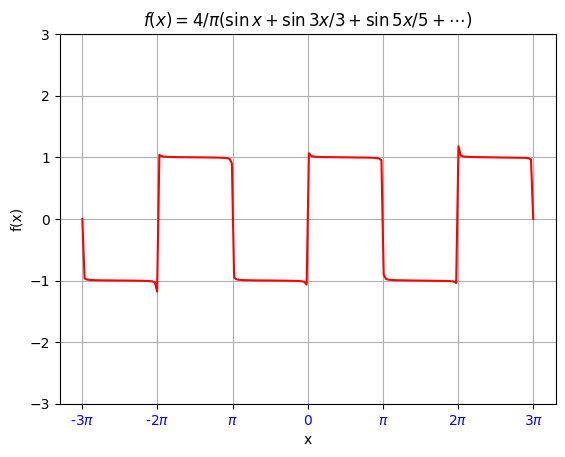

In [29]:
import numpy as np
import matplotlib.pyplot as plt
 
# The codes below demonstrate the ticks and labels in x axis
n = 100
x = np.linspace(-3 * np.pi, 3 * np.pi, 200)
y = 0
# Approach 1: by using for loop to add the terms
# for i in np.arange(n):ㄒ
#     k = 2 * i + 1
#     y = y + np.sin(k * x) / k
 
# Approach 2:  by using the vectorized computation (broadcasting)
n = 100
k = 2 * np.arange(n) + 1
Y = np.sin(x.reshape(-1, 1) * k) / k
# Y = np.sin(k * x[:, np.newaxis]) / k
# print(x[:, np.newaxis].shape)
 
y = Y.sum(axis = 1) # sum along the row
 
fig, ax = plt.subplots(1)
ax.plot(x, y * 4 / np.pi, color = "r")
ax.set_xticks(np.array([-3, -2, -1, 0, 1, 2, 3]) * np.pi)
ax.set_xticklabels(
    ["-3$\pi$", "-2$\pi$", "$\pi$", "0", "$\pi$", "2$\pi$", "3$\pi$"],
    fontsize=10, color="b",
)
ax.set_ylim([-3, 3])
ax.grid(True)
ax.set_xlabel('x'),  ax.set_ylabel('f(x)') 
ax.set_title('$f(x) = 4/\pi(\sin x+\sin 3x/3+\sin 5x/5 + \cdots)$')
plt.show()


### $注意事項與討論$
### 1. 通過 for 迴圈（註釋掉的部分）或者向量化計算（使用 broadcasting）來計算函數的值。最終得到 y 值，並且進行了相應的數值調整。
### 2. 這個函數可以看作是一個以正弦波形為基礎，並且振幅隨著 $n$ 的增加而縮小的無窮級數。這種類型的級數在數學和物理學中具有重要的應用，可以用來描述許多周期性現象。

範例 7：基本的 Broadcasting 技術。

利用計算圖一的標準常態 CDF 表來比較迴圈與 Broadcasting 在觀念與技術之不同。


In [31]:
import numpy as np
from scipy.stats import norm
 
z_col = np.arange(0, 3.1, 0.1)
z_row = np.arange(0, 0.1, 0.01)
# Approach 1: use double loop
Z = np.zeros((len(z_col), len(z_row)))
for i in range(len(z_col)):
    for j in range(len(z_row)):
        Z[i, j] = norm.cdf(z_col[i] + z_row[j])
print(np.round(Z, 4))
 
# Approach 2: use broadcasting
Z = norm.cdf(z_col.reshape(-1, 1) + z_row) # reshape(-1, 1): column vector
M_str = np.array2string(np.round(Z, 4), formatter={'float_kind':lambda x: "%.4f" % x})
print(M_str)

[[0.5    0.504  0.508  0.512  0.516  0.5199 0.5239 0.5279 0.5319 0.5359]
 [0.5398 0.5438 0.5478 0.5517 0.5557 0.5596 0.5636 0.5675 0.5714 0.5753]
 [0.5793 0.5832 0.5871 0.591  0.5948 0.5987 0.6026 0.6064 0.6103 0.6141]
 [0.6179 0.6217 0.6255 0.6293 0.6331 0.6368 0.6406 0.6443 0.648  0.6517]
 [0.6554 0.6591 0.6628 0.6664 0.67   0.6736 0.6772 0.6808 0.6844 0.6879]
 [0.6915 0.695  0.6985 0.7019 0.7054 0.7088 0.7123 0.7157 0.719  0.7224]
 [0.7257 0.7291 0.7324 0.7357 0.7389 0.7422 0.7454 0.7486 0.7517 0.7549]
 [0.758  0.7611 0.7642 0.7673 0.7704 0.7734 0.7764 0.7794 0.7823 0.7852]
 [0.7881 0.791  0.7939 0.7967 0.7995 0.8023 0.8051 0.8078 0.8106 0.8133]
 [0.8159 0.8186 0.8212 0.8238 0.8264 0.8289 0.8315 0.834  0.8365 0.8389]
 [0.8413 0.8438 0.8461 0.8485 0.8508 0.8531 0.8554 0.8577 0.8599 0.8621]
 [0.8643 0.8665 0.8686 0.8708 0.8729 0.8749 0.877  0.879  0.881  0.883 ]
 [0.8849 0.8869 0.8888 0.8907 0.8925 0.8944 0.8962 0.898  0.8997 0.9015]
 [0.9032 0.9049 0.9066 0.9082 0.9099 0.9115 0.9131 

### $注意事項與討論$
### 1. 使用 NumPy 和 SciPy 中的標準正態分佈函數 norm.cdf 來生成二維數組 Z。這個數組中的元素是根據給定的 z_col 和 z_row 陣列的組合計算得到的累積分佈函數（CDF）值。
### 2. 第一種方法使用了雙重迴圈，遍歷 z_col 和 z_row 的所有組合，計算並填充 Z 中的每個元素，這樣得到了一個二維的結果。
### 3. 第二種方法使用了廣播（broadcasting）的概念，將 z_col 和 z_row 進行相應的形狀調整（reshape）後，直接進行矩陣運算，得到了與第一種方法相同的結果，但更為簡潔。

範例 8：基本的 Broadcasting 技術。
繪製函數 $f(x)=\frac{e^{\alpha x}}{e^{\alpha x} +1}, \alpha=1, 2, \cdots, 10$

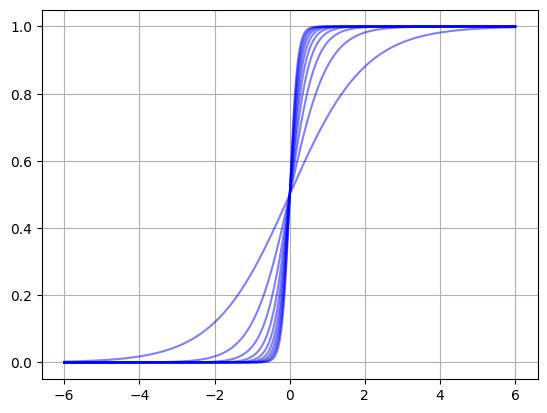

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace(-6, 6, 300)
alpha = np.arange(1, 11, 1)
Y = np.exp(x.reshape(-1, 1) * alpha) / (np.exp(x.reshape(-1, 1) * alpha) + 1)
plt.plot(x, Y, color = 'b', alpha = 0.5)
plt.grid(True)
plt.show()

### $注意事項與討論$
### 1. alpha 是一個由 1 到 10 的數組，表示 sigmoid 函數中的參數。
### 2. 通過廣播，將 x 與 alpha 進行相應的形狀調整，然後使用指數函數和運算來計算 sigmoid 函數的值。
### 3. Sigmoid 函數具有以下特點：將輸入映射到（0, 1）, 區間單調遞增函數, 可微性, 用於二元分類...總的來說，Sigmoid 函數的主要作用是將任意實數的輸入映射到了一個 0 到 1 之間的值，通常在二元分類問題中使用。

### $ 1. 繪製下圖（線條顏色、符號與數量都可以由程式輕易變更）$


<!-- ### (1)使用迴圈
<img src="array_proc_demo.jpg" alt="Getting started" width="800"/>  -->

<img src="array_proc_demo.jpg" alt="Getting started" width="800"/> 


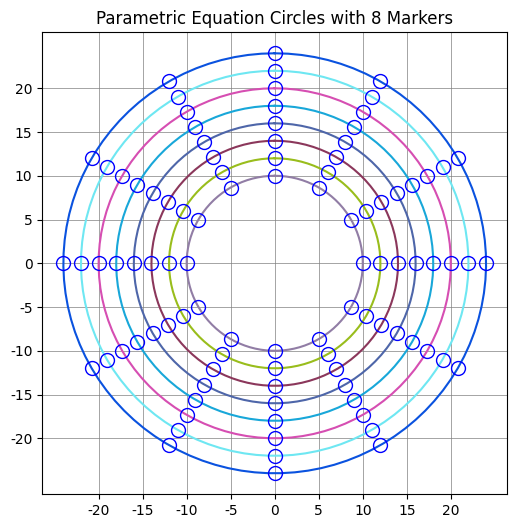

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 可以由程式輕易變更的參數
n = 8  # 同心圓的数量
num_markers = 12  # marker的數量
marker_size = 10  # marker的大小
chosen_marker = 'o'  # 特定的marker類型
marker_color = 'blue'  # marker的邊框颜色
circle_colors = np.random.rand(n, 3)  # 隨機生成所有顏色
r = np.arange(10, 10 + 2 * n, 2)  

theta = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.subplots(figsize=(6, 6))

#迴圈應用
for i, radius in enumerate(r):  
    x = radius * np.sin(theta)
    y = radius * np.cos(theta)
    ax.plot(x, y, color=circle_colors[i % len(circle_colors)]) 

    for angle in np.linspace(0, 2*np.pi, num_markers, endpoint=False):
        x_marker = radius * np.sin(angle)
        y_marker = radius * np.cos(angle)
        ax.plot(x_marker, y_marker, marker=chosen_marker, markersize=marker_size, color=marker_color, markerfacecolor='none')

ax.set_xticks(np.arange(-20, 21, step=5))
ax.set_yticks(np.arange(-20, 21, step=5))

ax.set_xticklabels(np.arange(-20, 21, step=5))
ax.set_yticklabels(np.arange(-20, 21, step=5))

plt.grid(visible=True, color='gray', linestyle='-', linewidth=0.5)
plt.title(f'Parametric Equation Circles with {n} Markers')
plt.show()




### $注意事項與討論 : $

### 1. Matplotlib 庫的使用:<br>import matplotlib.pyplot as plt 這行程式碼來引入 Matplotlib 庫，它是一個用於繪製資料可視化的 Python 庫。

### 2. NumPy 陣列的建立和操作:<br>import numpy as np 來引入 NumPy 庫，它提供了大量用於處理陣列的功能。例如，np.arange() 用於建立等差數列，np.sin() 和 np.cos() 用於計算正弦和餘弦值。

### 3. 使用迴圈來迭代處理:<br>for 迴圈來遍歷同心圓的半徑以及每個同心圓上的角度，以繪製同心圓和 marker。

### 4. 參數化方程式的應用:<br>參數化方程式來計算同心圓上的點的座標，這是一種使用參數表達的方式來描述曲線或圖形的方法。

### 5. Matplotlib 的圖形繪製和設定:<br>plt.subplots() 來建立一個新的圖形和子圖。然後通過 ax.plot() 和 ax.set_ 等方法來設定圖形的屬性，如線條顏色、標記類型、座標軸刻度等。

### (2)使用Broadcasting技術

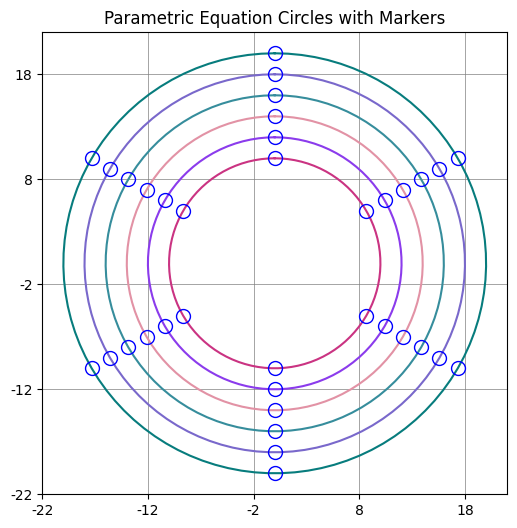

In [239]:
import matplotlib.pyplot as plt
import numpy as np

# 可以由程式輕易變更的參數
n = 6  # 同心圓的数量
step_size = 2  # 步長
marker_type = 'o'  # 符號
marker_size = 10  # 符號大小
line_colors = np.random.rand(n, 3)  # 隨機生成所有顏色
marker_color = 'blue'  # 符號顏色

min_radius = 10  
max_radius = min_radius + n * step_size  

r = np.arange(min_radius, max_radius, step_size)[:, np.newaxis]  # Broadcasting，將r變成2D array

theta = np.linspace(0, 2*np.pi, 100)

x = r * np.sin(theta)
y = r * np.cos(theta)

angles = np.linspace(0, 2*np.pi, n, endpoint=False)
x_marker = (r * np.sin(angles))  # Broadcasting，生成 marker 的 x 坐標
y_marker = (r * np.cos(angles))  # Broadcasting，生成 marker 的 y 坐標

fig, ax = plt.subplots(figsize=(6, 6))

for i in range(len(r)):
    ax.plot(x[i], y[i], color=line_colors[i % n])  

ax.plot(x_marker, y_marker, marker=marker_type, markersize=marker_size, linestyle='', color=marker_color, markerfacecolor='none')  # 添加 marker，設定 markerfacecolor 為 none

ax.set_xticks(np.arange(-max_radius, max_radius + 1, step=10))
ax.set_xticks(np.arange(-max_radius, max_radius + 1, step=10))
ax.set_yticks(np.arange(-max_radius, max_radius + 1, step=10))

ax.set_xticklabels(np.arange(-max_radius, max_radius + 1, step=10))
ax.set_yticklabels(np.arange(-max_radius, max_radius + 1, step=10))

plt.grid(visible=True, color='gray', linestyle='-', linewidth=0.5)
plt.title(f'Parametric Equation Circles with Markers')
plt.show()



### $注意事項與討論 : $

### 1. Matplotlib 庫的使用:<br>import matplotlib.pyplot as plt 這行程式碼來引入 Matplotlib 庫，它是一個用於繪製資料可視化的 Python 庫。

### 2. 使用Broadcasting 的功能來處理陣列:<br> import numpy as np 來引入 NumPy 庫，它提供了大量用於處理陣列的功能。例如，np.arange() 用於建立等差數列，np.sin() 和 np.cos() 用於計算正弦和餘弦值。在這裡，你也使用了 Broadcasting 的功能來處理陣列。

### 3. 使用迴圈來迭代處理:<br>for 迴圈來遍歷同心圓的半徑以及每個同心圓上的角度，以繪製同心圓和 marker。

### 4. 參數化方程式的應用:<br>參數化方程式來計算同心圓上的點的座標，這是一種使用參數表達的方式來描述曲線或圖形的方法。

### 5. Matplotlib 的圖形繪製和設定:<br>plt.subplots() 來建立一個新的圖形和子圖。然後通過 ax.plot() 和 ax.set_ 等方法來設定圖形的屬性，如線條顏色、標記類型、座標軸刻度等。

### 延伸(1):增加填充颜色

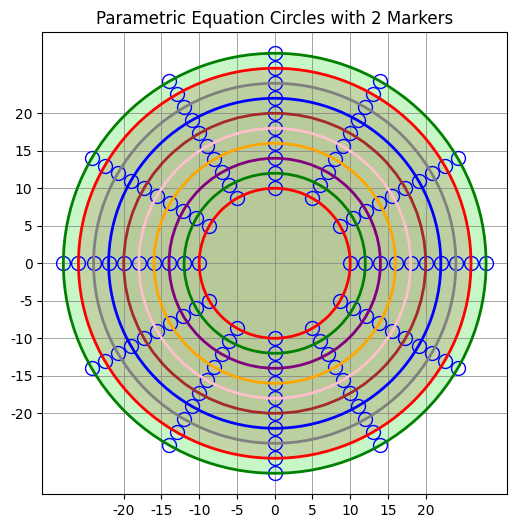

In [170]:
import matplotlib.pyplot as plt
import numpy as np

n = 2  # 同心圆的数量
num_markers = 12  # marker的数量
marker_size = 10  # marker的大小

chosen_marker = 'o'  # 选择特定的marker类型

# 自由設定所有顏色
marker_color = 'blue'  # marker的邊框顏色

circle_edge_colors = ['red', 'green', 'purple', 'orange', 'pink', 'brown', 'blue', 'gray']
circle_fill_colors = ['lightcoral', 'lightgreen', 'thistle', 'lightgoldenrodyellow', 'lightpink', 'lightsalmon', 'lightblue', 'lightgray']

r = np.arange(10, 30, 2)  

theta = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.subplots(figsize=(6, 6))

for i, radius in enumerate(r):  
    x = radius * np.sin(theta)
    y = radius * np.cos(theta)
    
    edge_color = circle_edge_colors[i % len(circle_edge_colors)]
    fill_color = circle_fill_colors[i % len(circle_fill_colors)]
    
    circle_fill = plt.Circle((0, 0), radius, color=fill_color, alpha=0.5, fill=True)
    ax.add_patch(circle_fill)
    
    circle_edge = plt.Circle((0, 0), radius, color=edge_color, fill=False, linewidth=2, zorder=10)
    ax.add_patch(circle_edge)
    
    for angle in np.linspace(0, 2*np.pi, num_markers, endpoint=False):
        x_marker = radius*np.sin(angle)
        y_marker = radius*np.cos(angle)
        ax.plot(x_marker, y_marker, marker=chosen_marker, markersize=marker_size, color=marker_color, markerfacecolor='none')  

ax.set_xticks(np.arange(-20, 21, step=5))
ax.set_yticks(np.arange(-20, 21, step=5))

ax.set_xticklabels(np.arange(-20, 21, step=5))
ax.set_yticklabels(np.arange(-20, 21, step=5))

plt.grid(visible=True, color='gray', linestyle='-', linewidth=0.5)
plt.title(f'Parametric Equation Circles with {n} Markers')
plt.show()


### $注意事項與討論 : $
### 1. 使用取餘數的方式循環改變顏色，並延伸出填滿顏色(fill_colors)，圖形顏色變得更豐富
### 2. 此圖一樣使用迴圈的方式產生同心圓和marker

使用取餘數的方式循環改變顏色，並延伸出填滿顏色(fill_colors)，圖形顏色變得更豐富
2. 此圖一樣使用迴圈的方式產生同心圓和marker

### 延伸(2):使用Broadcasting 技術繪製由直線組成的圓形

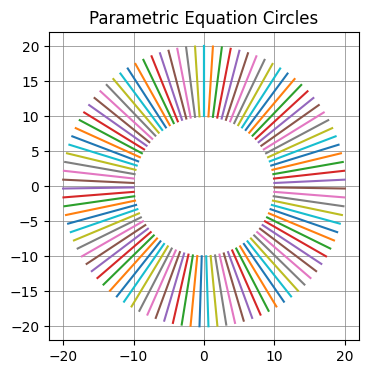

In [171]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2*np.pi, 100)    
r = np.array([10, 12, 14, 16, 18, 20])

x = r.reshape(-1, 1)* np.sin(theta)
y = r.reshape(-1, 1) * np.cos(theta)

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(x, y)


plt.grid(visible=True, color='gray', linestyle='-', linewidth=0.5)
plt.title('Parametric Equation Circles')
plt.show()


### $注意事項與討論 : $
### 1. 使用Broadcasting 技術，透過向量相乘的方式，繪製由直線組成的圓形

### $2. 繪製下圖一（線條顏色與數量都可以由程式輕易決定）$
<br><br>
<img src="loop_proj.png" alt="Getting started" width="400"/> 
<br>圖一、簡易北大摩天輪 
<br>
<img src="loop_proj_2.png" alt="Getting started" width="400"/> 
<br>圖二、增加籃子的數量
<br>
<img src="loop_proj_3.png" alt="Getting started" width="400"/> 
<br>圖三、更接近真實的摩天輪

### 圖一

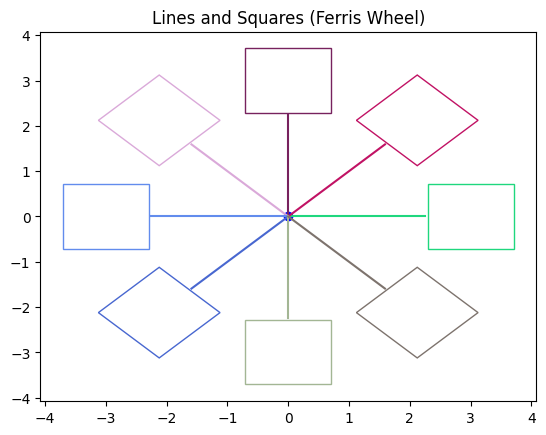

In [252]:
import matplotlib.pyplot as plt
import numpy as np

# 可以輕易改動的參數
line_color = 'green'  # 修改此處可以改變線條顏色
num_lines = 8  # 修改此處可以改變線的數量

# 固定參數
center = np.array([0, 0])
line_length = 3
line2_length = 2.25
square_side = 2

n = num_lines
angles = np.arange(0, 360, 360/n)
angles = np.radians(angles)

fig, ax = plt.subplots()

ax.plot(center[0], center[1], 'bo')

end_points = center + line_length * np.column_stack((np.cos(angles), np.sin(angles)))
ax.plot(np.column_stack((center[0]*np.ones(n), end_points[:,0])), np.column_stack((center[1]*np.ones(n), end_points[:,1])), color=line_color, alpha=0)

colors = [np.random.rand(3,) for _ in range(n)]

square_points = np.zeros((n, 5, 2))
for i, angle in enumerate(angles):
    square_points[i] = end_points[i] + np.array([
        [np.cos(angle + np.pi/4), np.sin(angle + np.pi/4)],
        [np.cos(angle + 3*np.pi/4), np.sin(angle + 3*np.pi/4)],
        [np.cos(angle - 3*np.pi/4), np.sin(angle - 3*np.pi/4)],
        [np.cos(angle - np.pi/4), np.sin(angle - np.pi/4)],
        [np.cos(angle + np.pi/4), np.sin(angle + np.pi/4)]
    ]) * square_side / 2

for i, square in enumerate(square_points):
    square_x = square[:, 0]
    square_y = square[:, 1]
    ax.add_patch(plt.Polygon(list(zip(square_x, square_y)), edgecolor=colors[i], fill=False))

end_points_line2 = center + line2_length * np.column_stack((np.cos(angles), np.sin(angles)))

for i in range(n):
    ax.plot([center[0], end_points_line2[i, 0]], [center[1], end_points_line2[i, 1]], color=colors[i], linestyle='-', linewidth=1.5)

plt.title('Lines and Squares (Ferris Wheel)')
plt.show()


### $注意事項與討論 : $
### 1. 這段程式可以輕易改變線的顏色和數量。首先，在第一項中可以調整 line_color 來改變線的顏色，num_lines 來改變線的數量。接著，程式根據設定的參數繪製出相應數量的線、正方形邊框和第二條線。
### 2. 使用了 Matplotlib 和 NumPy，可以輕鬆地調整線的特性。
### 3. 使用迴圈計算迭代

### 圖二

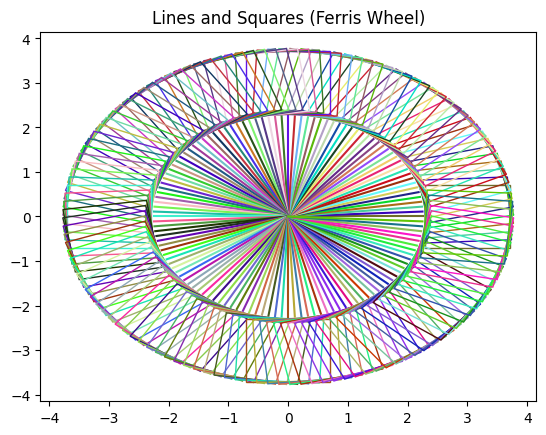

In [253]:
import matplotlib.pyplot as plt
import numpy as np

# 可以輕易改動的參數
line_color = 'green'  # 修改此處可以改變線條顏色
num_lines = 128  # 修改此處可以改變線的數量

# 固定參數
center = np.array([0, 0])
line_length = 3
line2_length = 2.25
square_side = 2

n = num_lines
angles = np.arange(0, 360, 360/n)
angles = np.radians(angles)

fig, ax = plt.subplots()

ax.plot(center[0], center[1], 'bo')


end_points = center + line_length * np.column_stack((np.cos(angles), np.sin(angles)))
ax.plot(np.column_stack((center[0]*np.ones(n), end_points[:,0])), np.column_stack((center[1]*np.ones(n), end_points[:,1])), color=line_color, alpha=0)


colors = [np.random.rand(3,) for _ in range(n)]

square_points = np.zeros((n, 5, 2))
for i, angle in enumerate(angles):
    square_points[i] = end_points[i] + np.array([
        [np.cos(angle + np.pi/4), np.sin(angle + np.pi/4)],
        [np.cos(angle + 3*np.pi/4), np.sin(angle + 3*np.pi/4)],
        [np.cos(angle - 3*np.pi/4), np.sin(angle - 3*np.pi/4)],
        [np.cos(angle - np.pi/4), np.sin(angle - np.pi/4)],
        [np.cos(angle + np.pi/4), np.sin(angle + np.pi/4)]
    ]) * square_side / 2

for i, square in enumerate(square_points):
    square_x = square[:, 0]
    square_y = square[:, 1]
    ax.add_patch(plt.Polygon(list(zip(square_x, square_y)), edgecolor=colors[i], fill=False))
end_points_line2 = center + line2_length * np.column_stack((np.cos(angles), np.sin(angles)))


for i in range(n):
    ax.plot([center[0], end_points_line2[i, 0]], [center[1], end_points_line2[i, 1]], color=colors[i], linestyle='-', linewidth=1.5)

plt.title('Lines and Squares (Ferris Wheel)')
plt.show()


### 圖三

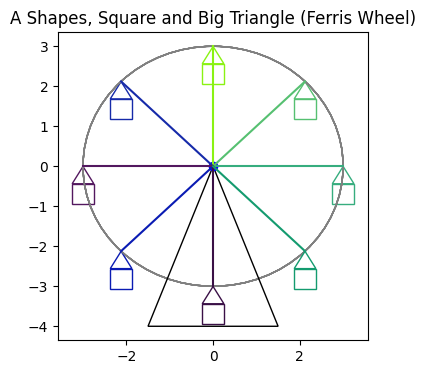

In [255]:
import matplotlib.pyplot as plt
import numpy as np

# 設定參數
n = 8  # 方框數量 (可以根據需要更改)
box_size = 0.5  # 方框大小 (可以根據需要調整)
use_random_colors = True  # 是否使用隨機顏色


center = np.array([0, 0])

line2_length = 3

angles = np.arange(0, 360, 360/n)

angles = np.radians(angles)

def draw_A(ax, center, size, color):
    square_vertices = np.array([[center[0]-size/2, center[1]], 
                               [center[0]+size/2, center[1]], 
                               [center[0]+size/2, center[1]-size], 
                               [center[0]-size/2, center[1]-size]])
    triangle_vertices = np.array([[center[0]-size/2, center[1]], 
                                [center[0], center[1]+np.sqrt(3)*size/2], 
                                [center[0]+size/2, center[1]]])
    
    ax.add_patch(plt.Polygon(square_vertices, closed=True, edgecolor=color, facecolor='none'))
    ax.add_patch(plt.Polygon(triangle_vertices, closed=True, edgecolor=color, facecolor='none'))


fig, ax = plt.subplots(figsize=(4, 4))  

ax.plot(center[0], center[1], 'bo') 

for i in range(n):
    color = np.random.rand(3,) if use_random_colors else colors[i]  
    angle_rad = np.radians(i * (360/n))  
    
    end_point = center + line2_length * np.array([np.cos(angle_rad), np.sin(angle_rad)])
    ax.plot([center[0], end_point[0]], [center[1], end_point[1]], color=color, linewidth=1.5)


    circle = plt.Circle(center, line2_length, edgecolor="gray", facecolor='none')
    ax.add_patch(circle)

  
    triangle_center = end_point
    triangle_vertex = triangle_center + box_size * np.array([0, np.sqrt(3)/2])  
    triangle_vertex[1] -= 0.87  
    draw_A(ax, triangle_vertex, box_size, color)


big_triangle_vertices = np.array([[-1.5, -4], [1.5, -4], [0, 0]])
color = "black"  
ax.add_patch(plt.Polygon(big_triangle_vertices, closed=True, edgecolor=color, facecolor='none'))

plt.title('A Shapes, Square and Big Triangle (Ferris Wheel)')
plt.show()


### $注意事項與討論 : $
### 1. 隨機顏色：在設定 use_random_colors 變數時，你提供了一個選擇是否使用隨機顏色的選項。這使得程式碼更具彈性，可以根據需要選擇顏色生成方式。
### 2. A Shapes 函數：你定義了一個 draw_A 函數，這個函數用於畫出 A Shapes。這提高了程式碼的結構性，使得每個元素的功能都更加明確。
### 3. 設定參數的彈性：透過變數來設定各項參數是個很好的實踐，但也可以考慮使用另一種方法，例如使用 argparse 庫來讓程式在執行時接受命令行參數。

### 延伸(1) 五角形摩天輪

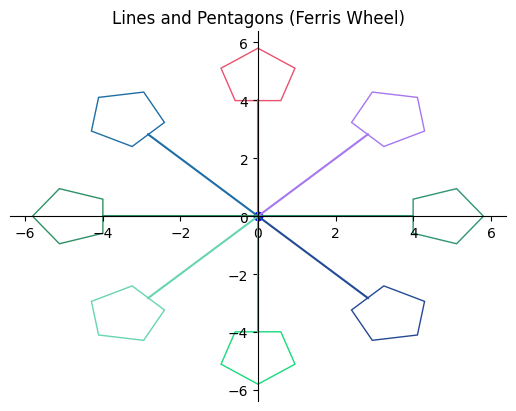

In [123]:
import matplotlib.pyplot as plt
import numpy as np


center = np.array([0, 0])


line_length = 4.8


line2_length = 4


pentagon_side = 2

# 方框數量 n 
n = 8

angles = np.arange(0, 360, 360/n)

angles = np.radians(angles)

fig, ax = plt.subplots()

ax.plot(center[0], center[1], 'bo') 

end_points = center + line_length * np.column_stack((np.cos(angles), np.sin(angles)))

ax.plot(np.column_stack((center[0]*np.ones(n), end_points[:,0])), np.column_stack((center[1]*np.ones(n), end_points[:,1])), 'g-', alpha=0)

colors = [np.random.rand(3,) for _ in range(n)]

pentagon_points = np.zeros((n, 6, 2))
for i, angle in enumerate(angles):
    pentagon_points[i] = end_points[i] + np.array([
        [np.cos(angle), np.sin(angle)],
        [np.cos(angle + 2*np.pi/5), np.sin(angle + 2*np.pi/5)],
        [np.cos(angle + 4*np.pi/5), np.sin(angle + 4*np.pi/5)],
        [np.cos(angle + 6*np.pi/5), np.sin(angle + 6*np.pi/5)],
        [np.cos(angle + 8*np.pi/5), np.sin(angle + 8*np.pi/5)],
        [np.cos(angle), np.sin(angle)]  
    ]) * pentagon_side / 2

for i, pentagon in enumerate(pentagon_points):
    pentagon_x = pentagon[:, 0]
    pentagon_y = pentagon[:, 1]
    ax.add_patch(plt.Polygon(list(zip(pentagon_x, pentagon_y)), edgecolor=colors[i], fill=False))

end_points_line2 = center + line2_length * np.column_stack((np.cos(angles), np.sin(angles)))

for i in range(n):
    ax.plot([center[0], end_points_line2[i, 0]], [center[1], end_points_line2[i, 1]], color=colors[i], linestyle='-', linewidth=1.5)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.title('Lines and Pentagons (Ferris Wheel)')
plt.show()


### 延伸(2) 星形摩天輪

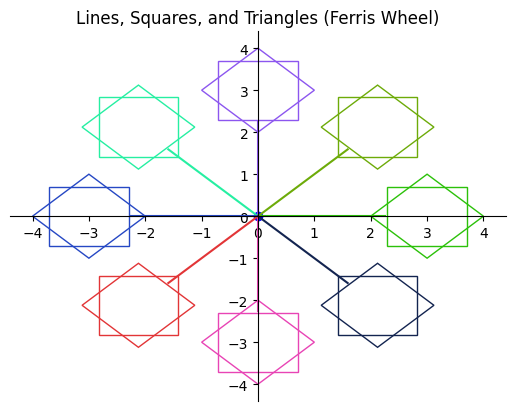

In [61]:
import matplotlib.pyplot as plt
import numpy as np

center = np.array([0, 0])

line_length = 3

line2_length = 2.25

square_side = 2

triangle_side = square_side

# 方框數量 n 
n = 8

angles = np.arange(0, 360, 360/n)

angles = np.radians(angles)

fig, ax = plt.subplots()

ax.plot(center[0], center[1], 'bo') 

end_points = center + line_length * np.column_stack((np.cos(angles), np.sin(angles)))

ax.plot(np.column_stack((center[0]*np.ones(n), end_points[:,0])), np.column_stack((center[1]*np.ones(n), end_points[:,1])), 'g-', alpha=0)

colors = [np.random.rand(3,) for _ in range(n)]

square_points = np.zeros((n, 5, 2))
for i, angle in enumerate(angles):
    square_points[i] = end_points[i] + np.array([
        [np.cos(angle + np.pi/4), np.sin(angle + np.pi/4)],
        [np.cos(angle + 3*np.pi/4), np.sin(angle + 3*np.pi/4)],
        [np.cos(angle - 3*np.pi/4), np.sin(angle - 3*np.pi/4)],
        [np.cos(angle - np.pi/4), np.sin(angle - np.pi/4)],
        [np.cos(angle + np.pi/4), np.sin(angle + np.pi/4)]
    ]) * square_side / 2

triangle_points = np.zeros((n, 4, 2))
for i, angle in enumerate(angles):
    triangle_points[i] = end_points[i] + np.array([
        [np.cos(angle), np.sin(angle)],
        [np.cos(angle + np.pi/2), np.sin(angle + np.pi/2)],
        [np.cos(angle + np.pi), np.sin(angle + np.pi)],
        [np.cos(angle + 3*np.pi/2), np.sin(angle + 3*np.pi/2)]
    ]) * triangle_side / 2

for i, square in enumerate(square_points):
    square_x = square[:, 0]
    square_y = square[:, 1]
    ax.add_patch(plt.Polygon(list(zip(square_x, square_y)), edgecolor=colors[i], fill=False))

for i, triangle in enumerate(triangle_points):
    triangle_x = triangle[:, 0]
    triangle_y = triangle[:, 1]
    ax.add_patch(plt.Polygon(list(zip(triangle_x, triangle_y)), edgecolor=colors[i], fill=False))


end_points_line2 = center + line2_length * np.column_stack((np.cos(angles), np.sin(angles)))

for i in range(n):
    ax.plot([center[0], end_points_line2[i, 0]], [center[1], end_points_line2[i, 1]], color=colors[i], linestyle='-', linewidth=1.5)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.title('Lines, Squares, and Triangles (Ferris Wheel)')
plt.show()


### $3. 計算如下右圖的卡方右尾面積與自由度對照表，並輸出到 EXCEL 檔，檔名為：Chi2Table.xlsx，含欄與列的名稱，如下左圖。$
<br>
<img src="save_to_excel-1.png" alt="Getting started" width="800"/> 

### (1)計算自由度為 1 的卡方分佈中，機率累積到 1 的分位數

In [67]:
from scipy.stats import chi2
 
F = 0.995 # cumulative to 1
df = 1
x = chi2.ppf(F, df)  # inverse of CDF
print(x)

7.879438576622416


### (2)計算不同自由度和信心水準下的卡方分佈的相關數據，並以表格形式輸出

In [183]:
from scipy.stats import chi2

# 設定自由度範圍
df_range = range(1, 21)  # 這裡假設自由度從 1 到 20

# 設定右尾面積範圍
F_range = [0.90, 0.95, 0.99]  # 可以根據需要調整

# 初始化表格
table = []

# 遍歷自由度和右尾面積
for df in df_range:
    row = [df]
    for F in F_range:
        x = chi2.ppf(F, df)
        row.append(round(1 - F, 3))  # 將右尾面積轉換為左尾面積並四捨五入
        row.append(round(x, 3))
    table.append(row)

# 列印表格標題
print(f'{"df":<5}{"F":<10}{"Area":<10}{"Value":<10}{"F":<10}{"Area":<10}{"Value":<10}')

# 列印表格內容
for row in table:
    print(f'{row[0]:<5}{F_range[0]:<10}{row[1]:<10}{row[2]:<10}{F_range[1]:<10}{row[3]:<10}{row[4]:<10}{F_range[2]:<10}{row[5]:<10}{row[6]:<10}')


df   F         Area      Value     F         Area      Value     
1    0.9       0.1       2.706     0.95      0.05      3.841     0.99      0.01      6.635     
2    0.9       0.1       4.605     0.95      0.05      5.991     0.99      0.01      9.21      
3    0.9       0.1       6.251     0.95      0.05      7.815     0.99      0.01      11.345    
4    0.9       0.1       7.779     0.95      0.05      9.488     0.99      0.01      13.277    
5    0.9       0.1       9.236     0.95      0.05      11.07     0.99      0.01      15.086    
6    0.9       0.1       10.645    0.95      0.05      12.592    0.99      0.01      16.812    
7    0.9       0.1       12.017    0.95      0.05      14.067    0.99      0.01      18.475    
8    0.9       0.1       13.362    0.95      0.05      15.507    0.99      0.01      20.09     
9    0.9       0.1       14.684    0.95      0.05      16.919    0.99      0.01      21.666    
10   0.9       0.1       15.987    0.95      0.05      18.307    0.99 

### $注意事項與討論 : $
### 1. 引入了 scipy.stats 中的 chi2 函數，用於處理卡方分佈相關的統計計算。
### 2. 設定了自由度範圍 df_range，假設自由度可能的取值範圍為 1 到 20。
### 3. 設定了右尾面積範圍 F_range，用於計算卡方分佈的右尾面積。
### 4. 使用嵌套迴圈遍歷自由度和右尾面積的組合，最後，以表格的形式印出計算結果

### (3)計算卡方左尾面積與自由度對照表，並輸出到 EXCEL 檔

In [102]:
from scipy.stats import chi2
import pandas as pd

# 定義自由度的範圍
degrees_of_freedom = range(1, 61)  # 自由度範圍從1到20

# 定義指定的F值
F_values = [0.995, 0.99, 0.975, 0.95, 0.9, 0.1, 0.05, 0.025, 0.01, 0.005]

# 創建空白表格
left_tail_area = []

# 生成表格數據
for df in degrees_of_freedom:
    row = [chi2.ppf(F, df) for F in F_values]
    left_tail_area.append(row)

# 創建 DataFrame
df = pd.DataFrame(left_tail_area, index=degrees_of_freedom, columns=F_values)

# 將 DataFrame 存為 Excel 檔
df.to_excel('Chi2Table.2.xlsx')

### $注意事項與討論 : $
### 1. 引入了 scipy.stats 中的 chi2 函數，用於處理卡方分佈相關的統計計算。
### 2. 引入了 pandas 库，用於處理數據表格。
### 3. 定義了自由度的範圍，從 1 到 60，也定義了一系列指定的 F 值，這些值代表了右尾面積。
### 4. 創建了一個空白的二維列表 left_tail_area，用於儲存表格數據。
### 5. 使用嵌套迴圈遍歷每個自由度和 F 值的組合，計算相應的卡方分佈的分位數，並將結果添加到 left_tail_area 中。
### 6. 利用 pandas 創建了一個 DataFrame df，並使用 left_tail_area 作為數據，設定了列索引為 F_values，行索引為 degrees_of_freedom。
### 7. 最後，將這個 DataFrame 存為一個名為 Chi2Table.2.xlsx 的 Excel 檔案。

### (4)計算卡方右尾面積與自由度對照表，並輸出到 EXCEL 檔

In [105]:
from scipy.stats import chi2
import pandas as pd

# 定義自由度的範圍
degrees_of_freedom = range(1, 61)  # 自由度範圍從1到20

# 定義指定的F值
F_values = [0.995, 0.99, 0.975, 0.95, 0.9, 0.1, 0.05, 0.025, 0.01, 0.005]

# 創建空白表格
right_tail_area = []

# 生成表格數據
for df in degrees_of_freedom:
    row = [chi2.isf(F, df) for F in F_values]
    right_tail_area.append(row)

# 創建 DataFrame
df = pd.DataFrame(right_tail_area, index=degrees_of_freedom, columns=F_values)

# 將 DataFrame 存為 Excel 檔
df.to_excel('Chi2Table.xlsx')

### $注意事項與討論 : $
### 1. 引入了 scipy.stats 中的 chi2 函數，用於處理卡方分佈相關的統計計算。
### 2. 引入了 pandas 库，用於處理數據表格。
### 3. 定義了自由度的範圍，從 1 到 60，也定義了一系列指定的 F 值，這些值代表了右尾面積。
### 4. 創建了一個空白的二維列表 right_tail_area，用於儲存表格數據。
### 5. 使用嵌套迴圈遍歷每個自由度和 F 值的組合，計算相應的卡方分佈的分位數，並將結果添加到 right_tail_area 中。
### 6. 利用 pandas 創建了一個 DataFrame df，並使用 right_tail_area 作為數據，設定了列索引為 F_values，行索引為 degrees_of_freedom。
### 7. 最後，將這個 DataFrame 存為一個名為 Chi2Table.2.xlsx 的 Excel 檔案。